<a href="https://colab.research.google.com/github/szn5400/CO2_all/blob/main/STT_pressure_myrescale_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is for MLP STT for pressure

The following code reads the data, partitions it into training and test set simulates the MLP model

In [ ]:
# This is code for pressure output for 400 epochs 
# Data is shuffled
# Rescaling done with data from the full dataset

import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

from read_data_unscaled import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy_unscaled import numpy_single


#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs = read()

#convert to numpy
features1_tr,target1_tr,features1_te,target1_te,permeability_min,permeability_max,porosity_min,porosity_max,surf_prod_rate_min,surf_prod_rate_max,min_target,max_target = numpy_single(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_pressures)



#train model MLP
batch_size = 250
model = MLP_single()

history = model.fit(features1_tr, target1_tr, validation_split=0.20, epochs=100, batch_size=250,shuffle=True, verbose=1)

model.evaluate(features1_te,target1_te)

All files: ['/content/drive/MyDrive/data/k1r1-h.out', '/content/drive/MyDrive/data/k1r2-h.out', '/content/drive/MyDrive/data/k1r3-h.out', '/content/drive/MyDrive/data/k1r4-h.out', '/content/drive/MyDrive/data/k1r5-h.out', '/content/drive/MyDrive/data/k1r6-h.out', '/content/drive/MyDrive/data/k1r7-h.out', '/content/drive/MyDrive/data/k1r8-h.out', '/content/drive/MyDrive/data/k1r9-h.out', '/content/drive/MyDrive/data/k2r1-h.out', '/content/drive/MyDrive/data/k2r2-h.out', '/content/drive/MyDrive/data/k2r3-h.out', '/content/drive/MyDrive/data/k2r4-h.out', '/content/drive/MyDrive/data/k2r5-h.out', '/content/drive/MyDrive/data/k2r6-h.out', '/content/drive/MyDrive/data/k2r7-h.out', '/content/drive/MyDrive/data/k2r8-h.out', '/content/drive/MyDrive/data/k2r9-h.out', '/content/drive/MyDrive/data/k3r1-h.out', '/content/drive/MyDrive/data/k3r2-h.out', '/content/drive/MyDrive/data/k3r3-h.out', '/content/drive/MyDrive/data/k3r4-h.out', '/content/drive/MyDrive/data/k3r5-h.out', '/content/drive/MyDriv

[7.453265425283462e-06, 0.0013456650776788592]

In [ ]:
model.evaluate(features1_te,target1_te)

12481/12481 [==============================] - 14s 1ms/step - loss: 7.4533e-06 - mae: 0.0013


[7.453265425283462e-06, 0.0013456650776788592]

In [ ]:
model_json = model.to_json()
with open("model_myrescale_500_shuf_STT_pressure_gitarch.json","w") as file:
    file.write(model_json)
    
model.save_weights("weights_myrescale_500_shuf_STT_pressure_gitarch.h5")

In [ ]:
gas_pred = model.predict(features1_te)

12481/12481 [==============================] - 13s 1ms/step


In [ ]:
len_gas_pred = len(gas_pred)
gas_predicted = [0]*len_gas_pred
gas_original = [0]*len_gas_pred
error_gas = [0]*len_gas_pred
Error_gas = 0
for i in range(len_gas_pred):
  gas_original[i] = (target1_te[i]*(max_target-min_target))+min_target
  gas_predicted[i] = (gas_pred[i]*(max_target-min_target))+min_target  
  error_gas[i] = abs(gas_original[i]-gas_predicted[i])
  error_gas_mse = pow((gas_original[i]-gas_predicted[i]),2)
  Error_gas+=error_gas_mse
Error_gas_mse = Error_gas/len_gas_pred
print("Mse error for gas saturation:",Error_gas_mse)

Mse error for gas saturation: [182.30641824]


In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=10,num=len(target1_te))

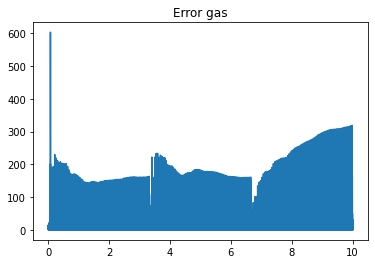

In [ ]:
plt.plot(x,error_gas)
plt.title("Error gas")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


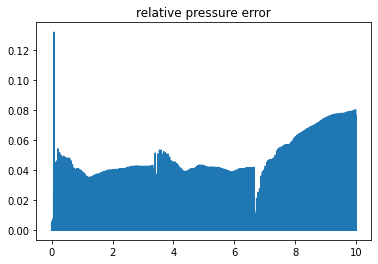

In [ ]:
relative_pressure_error = [0]*len_gas_pred
for i in range(len_gas_pred):
  relative_pressure_error[i] = error_gas[i]/gas_original[i]

plt.plot(x,relative_pressure_error)
plt.title("relative pressure error")
plt.show()


In [ ]:
gas_pred_train = model.predict(features1_tr)

99844/99844 [==============================] - 100s 1ms/step


In [ ]:
len_gas_pred_train = len(gas_pred_train)
gas_predicted_train = [0]*len_gas_pred_train 
gas_original_train = [0]*len_gas_pred_train 
error_gas_train = [0]*len_gas_pred_train 
Error_gas_train = 0
for i in range(len_gas_pred_train):
  gas_original_train[i] = (target1_tr[i]*(max_target-min_target))+min_target
  gas_predicted_train[i] = (gas_pred_train[i]*(max_target-min_target))+min_target  
  error_gas_train[i] = abs(gas_original_train[i]-gas_predicted_train[i])
  error_gas_mse = pow((gas_original_train[i]-gas_predicted_train[i]),2)
  Error_gas_train+=error_gas_mse
Error_gas_mse = Error_gas_train/len_gas_pred_train
print("Mse error for gas saturation:",Error_gas_mse)

Mse error for gas saturation: [26990.47067583]


(-229.18000000000004,
 4812.780000000001,
 -220.24830693885684,
 4821.711693061144)

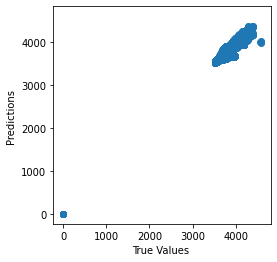

In [ ]:
plt.scatter(gas_original, gas_predicted)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
#plt.plot([-100, 100], [-100, 100])

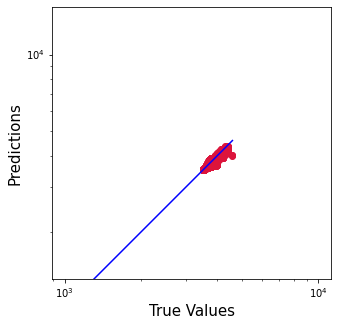

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(gas_original, gas_predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(gas_predicted), max(gas_original))
p2 = min(min(gas_predicted), min(gas_original))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


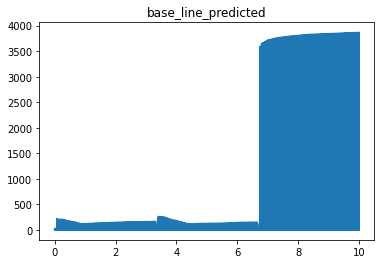

In [ ]:
# code to compare baseline 't-1' with 't'
base_line_original = [0]*len_gas_pred
base_line_predicted = [0]*len_gas_pred
for i in range(1,len_gas_pred):
  base_line_original[i] = abs(gas_original[i]-gas_original[i-1])
  base_line_predicted[i] = abs(gas_predicted[i]-gas_predicted[i-1])
plt.plot(x,base_line_predicted)
plt.title("base_line_predicted")
#plt.plot(x,base_line_original)
#plt.title("base_line_original")
plt.show()

In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
